In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import warnings
import os
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df = df.rename(columns={'N': 'Nitrogen (N)'})
df = df.rename(columns={'P': 'Phosphorous (P)'})
df = df.rename(columns={'K': 'Potassium (K)'})

In [ ]:
df.dtypes

Nitrogen (N)         int64
Phosphorous (P)      int64
Potassium (K)        int64
temperature        float64
humidity           float64
ph                 float64
rainfall           float64
label               object
dtype: object

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.describe()

,Nitrogen (N),Phosphorous (P),Potassium (K),temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()


Nitrogen (N)       0
Phosphorous (P)    0
Potassium (K)      0
temperature        0
humidity           0
ph                 0
rainfall           0
label              0
dtype: int64

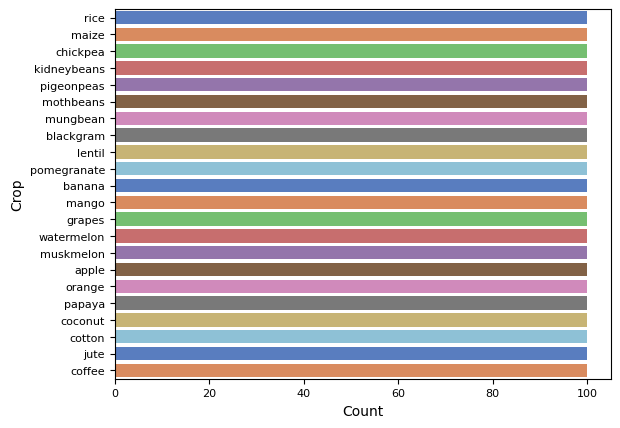

In [ ]:
bplot = sns.countplot(y='label',data=df, palette="muted")
bplot.set_ylabel('Crop', fontsize=10)
bplot.set_xlabel('Count', fontsize=10)
bplot.tick_params(labelsize=8)

In [ ]:
df_2 = df.drop(columns=['label'])

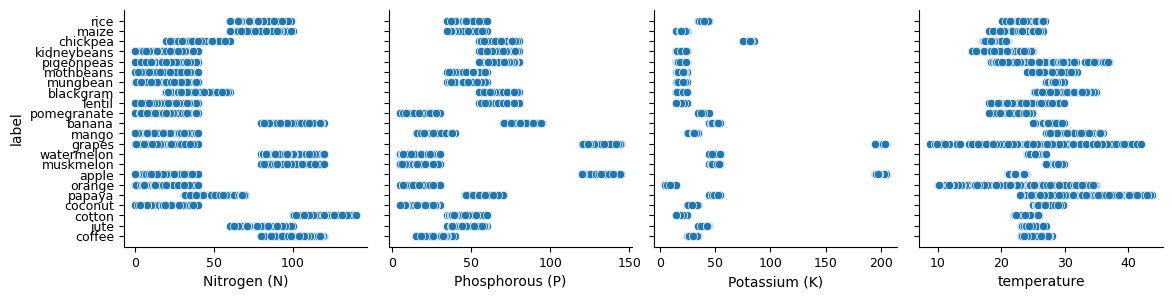

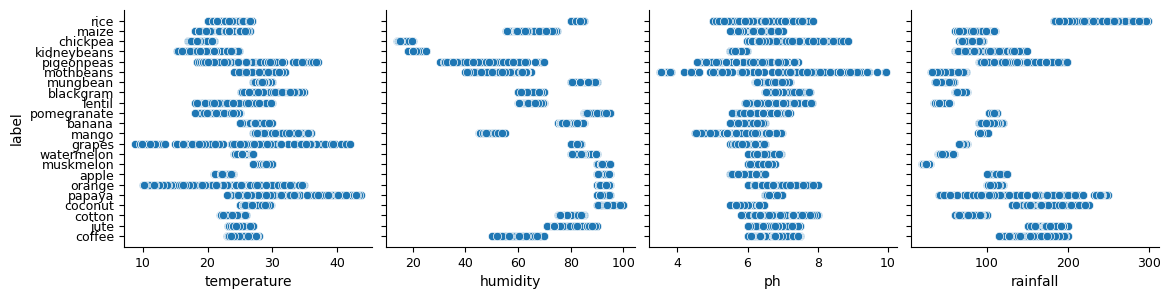

In [ ]:
for i in range(0, 6, 3):
   pplot = sns.pairplot(data=df,
                x_vars=df.columns[i:i+4],
                y_vars=['label'], height=3)
   pplot.tick_params(labelsize=9)

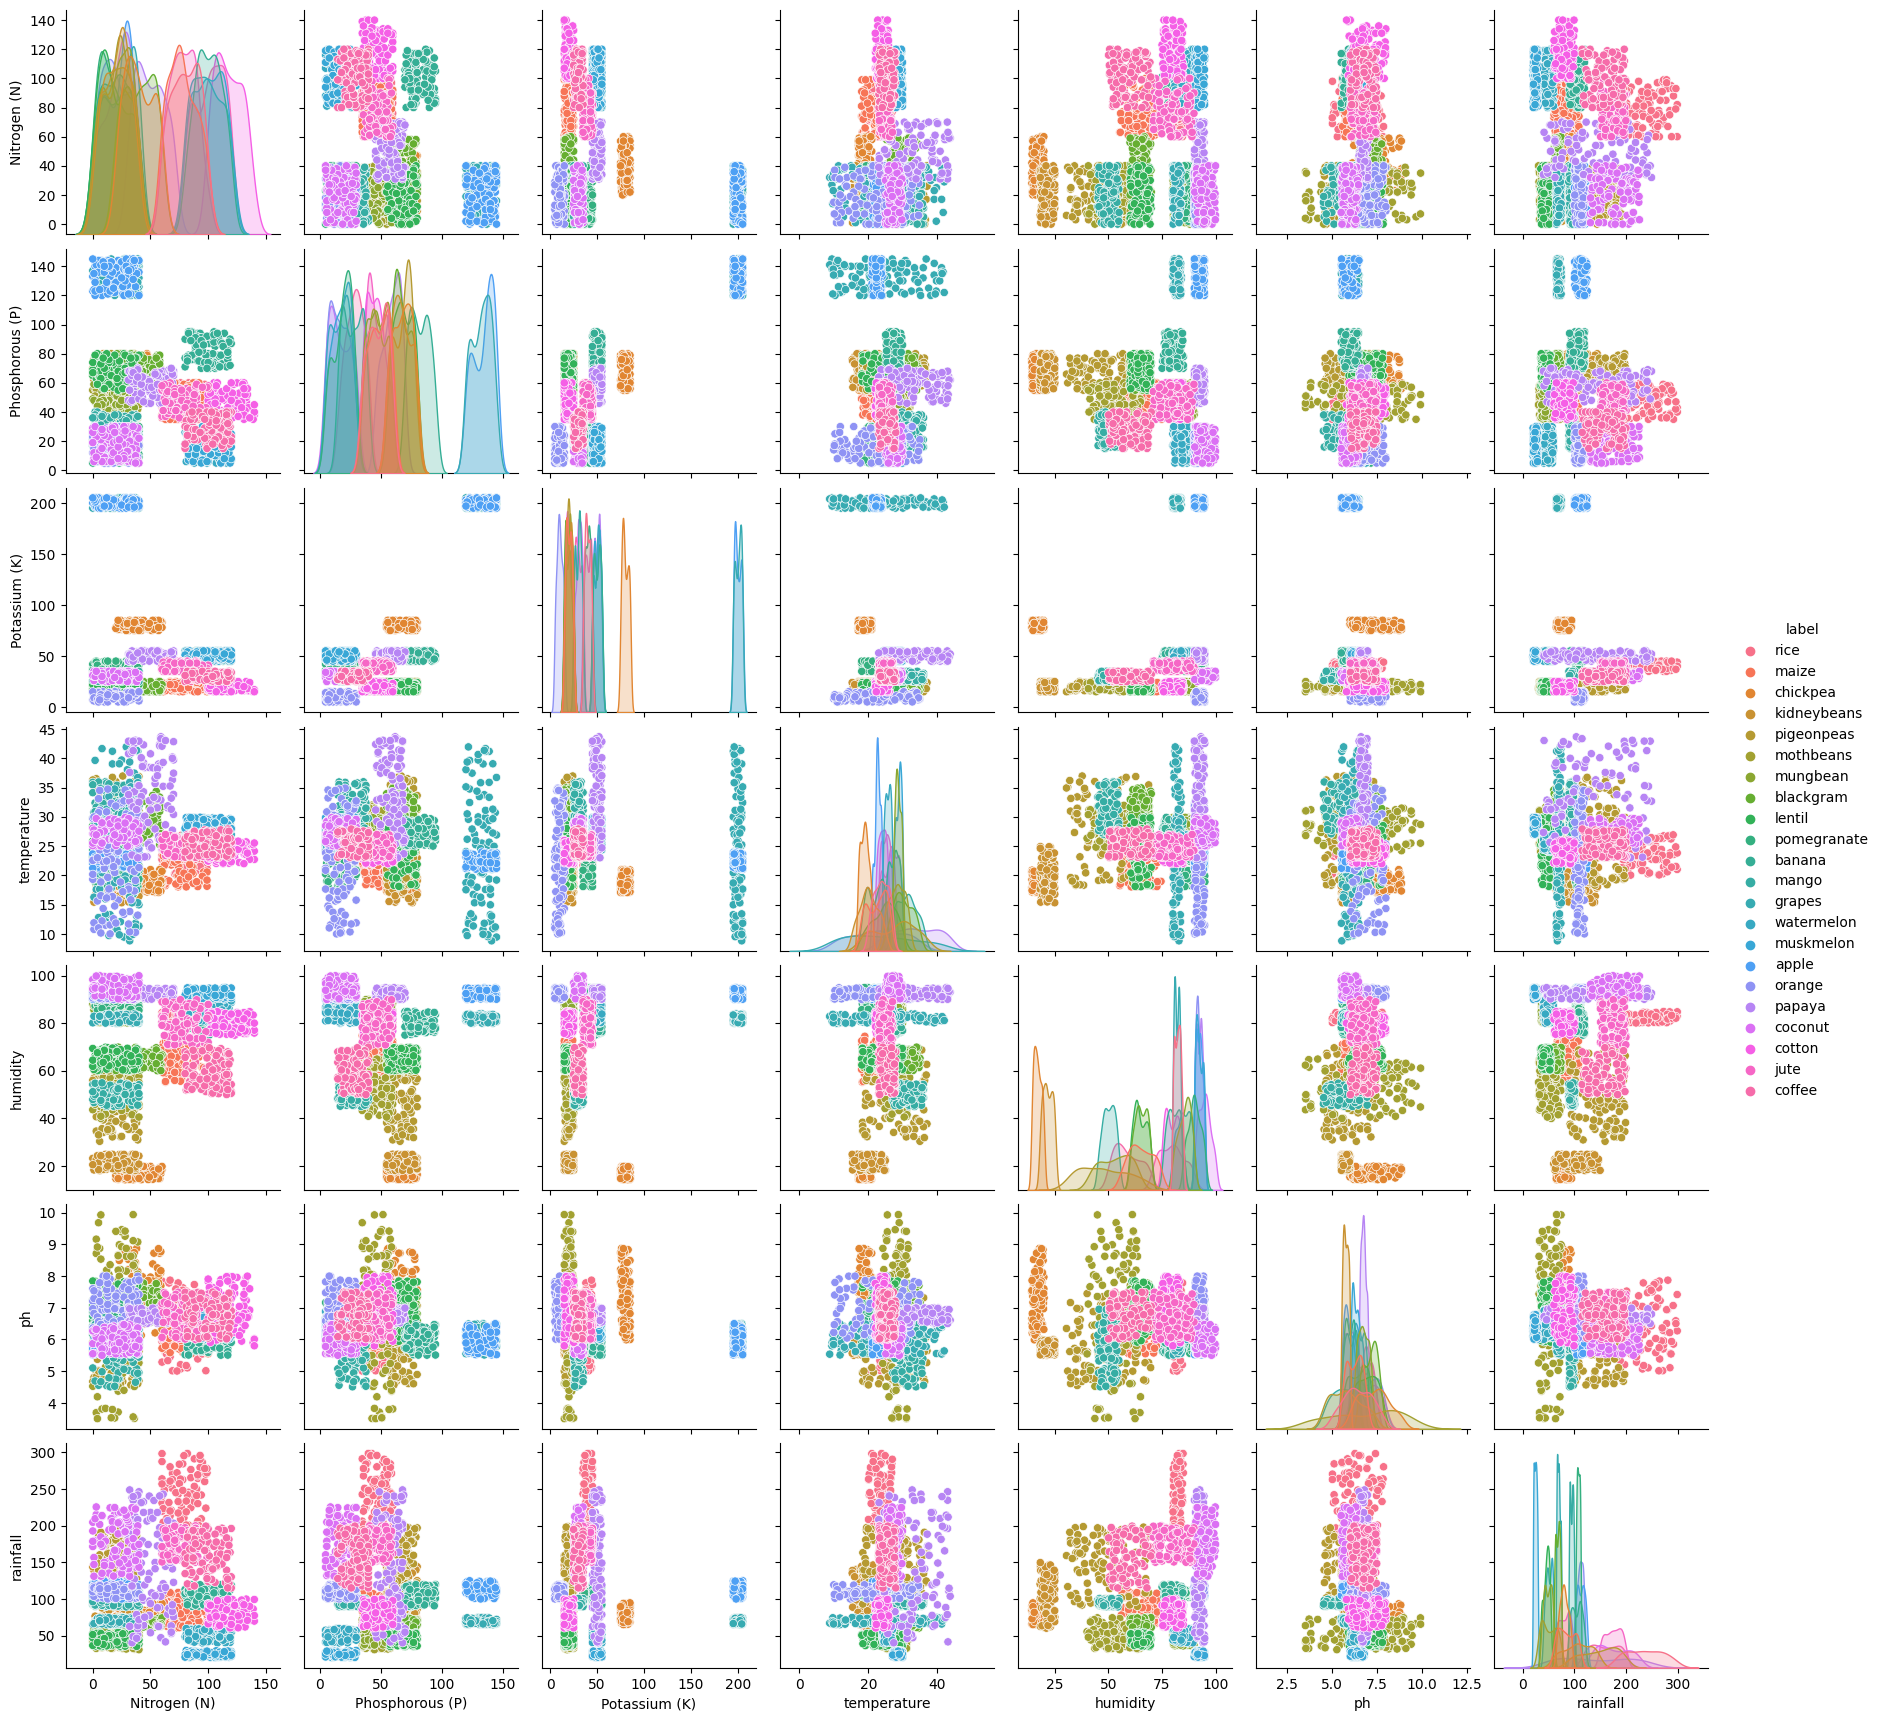

In [ ]:
sns.pairplot(data=df, hue = 'label')

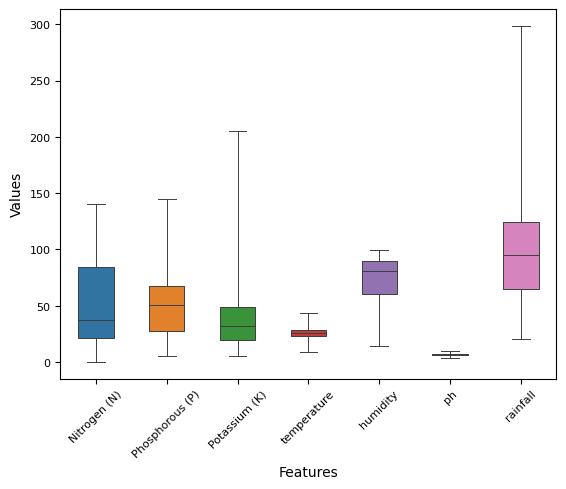

In [ ]:
splot = sns.boxplot(data=df_2, whis=np.inf,
        width=0.5, linewidth = 0.7)

# Labels and clean up on the plot
splot.set_ylabel('Values', fontsize=10)
splot.set_xlabel('Features', fontsize=10)
splot.tick_params(labelsize=8)
splot.yaxis.grid(True, clip_on=False)
plt.xticks(rotation=45)
splot.grid(False)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Nitrogen (N)'),
  Text(1.5, 0, 'Phosphorous (P)'),
  Text(2.5, 0, 'Potassium (K)'),
  Text(3.5, 0, 'temperature'),
  Text(4.5, 0, 'humidity'),
  Text(5.5, 0, 'ph'),
  Text(6.5, 0, 'rainfall')])

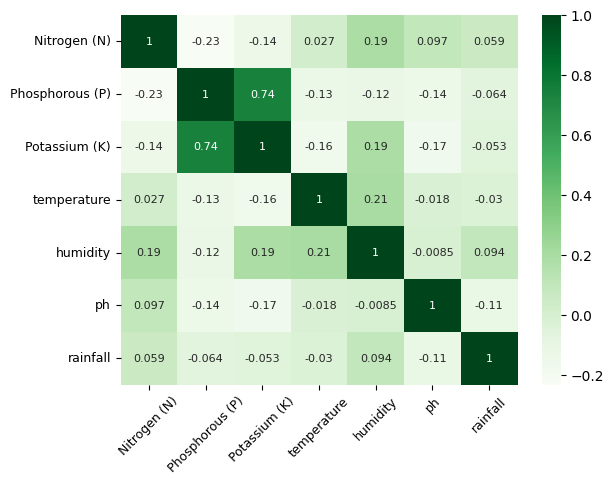

In [ ]:
cormat = df_2.corr()
round(cormat,2)
hplot = sns.heatmap(cormat,cmap="Greens", annot=True, annot_kws={"size": 8})
hplot.tick_params(labelsize=9)
plt.xticks(rotation=45)

In [ ]:
r = df.label.astype('category')
response = dict(enumerate(r.cat.categories))
df['response']=r.cat.codes


y=df.response
X=df[['Nitrogen (N)','Phosphorous (P)','Potassium (K)','temperature','humidity','ph','rainfall']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

In [ ]:
len(X_train)

1760

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM


In [ ]:
model_svm = svm.SVC(kernel='rbf', C=10)


In [ ]:
model_svm.fit(X_train_scaled, y_train)


y_pred = model_svm.predict(X_test_scaled)


accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy: ", accuracy)

Accuracy:  0.993


In [ ]:
precision = round(precision_score(y_test, y_pred, average='weighted',zero_division=1),3)
recall = round(recall_score(y_test, y_pred, average='weighted'),3)
f1 = round(f1_score(y_test, y_pred, average='weighted'),3)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.993
Recall: 0.993
F1 Score: 0.993


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)


scores = []
for train_index, test_index in kfold.split(X):
    X_train3, y_train3 = X.iloc[train_index], y.iloc[train_index]
    X_test3, y_test3 = X.iloc[test_index], y.iloc[test_index]
    model_svm.fit(X_train3, y_train3)

    y_pred = model_svm.predict(X_test3)
    score = accuracy_score(y_test3, y_pred)


    scores.append(score)


mean_accuracy = round(sum(scores) / len(scores),3)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.985
